## Imports

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import sys

sys.path.insert(0, '../../ml_logic')
from preprocessor import *
from data import *

In [3]:
# Import data from CSV
wingman_data = pd.read_csv("../../raw_data/trimmed_data/wingman_data_v5.csv")

In [4]:
target_columns_v1 = ['phase_no', 'eventsoe_no']
target_columns_v2 = ['category_no', 'subcategory_no', 'section_no', 'subsection_no', 'modifier_no']
target_columns_v3 = ['category_no']
target_columns_v4 = ['eventsoe_no']
target_columns_v5 = ['subcategory_no']
target_columns_v6 = ['subcategory_no']

In [5]:
# Clean
wingman_data_clean = clean_data(wingman_data)

# Preprocess
wingman_data_proc = preprocess_features(wingman_data_clean, target_columns=target_columns_v5)

/home/aaron/code/AaronDV17/wingman-project/baseline/../ml_logic/data.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wingman_data_cleaned.drop([
/home/aaron/code/AaronDV17/wingman-project/baseline/../ml_logic/encoders.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wingman_data_enc[''] = np.where(wingman_data_enc['type_fly'].isin(top_9_categories), wingman_data_enc['type_fly'], 'Other')
/home/aaron/code/AaronDV17/wingman-project/baseline/../ml_logic/encoders.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

## Train test split

In [6]:
X = wingman_data_proc.drop(columns=["subcategory_no"])
y = wingman_data_proc["subcategory_no"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Baseline model

In [8]:
baseline_mod = RandomForestClassifier(n_estimators=100, random_state=1)
baseline_mod.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [9]:
# Most Frequent Class Accuracy

freq = max(y.value_counts()/len(y))
print("Most Frequent Class Accuracy: %.2f%%" % (freq * 100.0))

Most Frequent Class Accuracy: 53.50%


In [10]:
# Baseline Accuracy

y_pred = baseline_mod.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Baseline Accuracy: %.2f%%" % (accuracy * 100.0))

Baseline Accuracy: 52.79%


## Model performance (not sure if this is needed for baseline)

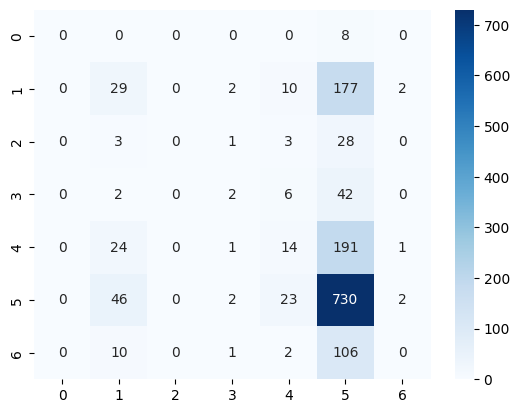

In [17]:
# Confusion Matrix

cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues');

In [23]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.25      0.13      0.17       220
           3       0.00      0.00      0.00        35
           4       0.22      0.04      0.07        52
           5       0.24      0.06      0.10       231
           6       0.57      0.91      0.70       803
           7       0.00      0.00      0.00       119

    accuracy                           0.53      1468
   macro avg       0.18      0.16      0.15      1468
weighted avg       0.40      0.53      0.43      1468



/home/aaron/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaron/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaron/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [24]:
# Feature Importance

feature_imp = pd.Series(baseline_mod.feature_importances_, index = X.columns).sort_values(ascending = False).head(10)
feature_imp

flight_hours_mean         0.126320
afm_hrs                   0.108330
dprt_time                 0.107615
cert_max_gr_wt            0.097633
power_units               0.083925
total_seats               0.040550
fixed_retractable_RETR    0.023428
pc_profession             0.017736
type_last_insp_ANNL       0.017473
eng_mfgr_LYCOMING         0.016933
dtype: float64